In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data

import torchvision.models as models
from collections import OrderedDict

import time
import pickle
import pandas
import numpy as np # to handle matrix and data operation
import matplotlib.pyplot as plt   #image visualisation
import scipy.stats as st


import W2reg_core as W2Rcore
import W2reg_misc as W2Rmisc


**Load pre-treated MNIST data.** 

The treatments make the predictions $y$ biased with respect to the variable $S$ (see the JMIV 2022 paper). 

In [2]:

[X_train,y_train,S_train,X_test,y_test,S_test]=W2Rmisc.Get_n_Treat_MNIST_srt()

#for i in range(0,5):
#  W2Rmisc.show_MNIST_image(i,X_train,y_train,S_train)


**Training phase with or without the W2 regulatization.**

In [3]:

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print('Device is',DEVICE)

Device is cpu


In [4]:
EPOCHS_in = 2
BATCH_SIZE_in = 200



#without regularisation

lambdavar=0.0000000001  #visualisation of the evolution of W2 during the gradient descent will be impossible if lambdavar = 0

model_no_reg = W2Rmisc.ResNet_18_for_MNIST_srt().to(DEVICE)

print('Run training - without reg')
Lists_Results_noreg=W2Rcore.W2R_fit(model_no_reg,X_train,y_train, S_train, lambdavar, EPOCHS = EPOCHS_in, BATCH_SIZE = BATCH_SIZE_in,obs_for_histo=50,DistBetween='All_predictions',DEVICE=DEVICE)

#with regularisation

lambdavar=0.00001

model_reg = W2Rmisc.ResNet_18_for_MNIST_srt().to(DEVICE)

print('Run training - with reg')
Lists_Results_reg=W2Rcore.W2R_fit(model_reg,X_train,y_train, S_train, lambdavar, EPOCHS = EPOCHS_in, BATCH_SIZE = BATCH_SIZE_in,obs_for_histo=50,DistBetween='All_predictions',DEVICE=DEVICE)



Run training - without reg
epoch 0 -- batchNb 1: Acc=0.2661358118057251 -- W2=0.0002315314247562563 --  lambda=1e-10
epoch 0 -- batchNb 2: Acc=0.24882790446281433 -- W2=0.0003775321730042046 --  lambda=1e-10
epoch 0 -- batchNb 3: Acc=0.245496928691864 -- W2=0.0006310915874087331 --  lambda=1e-10
epoch 0 -- batchNb 4: Acc=0.23938849568367004 -- W2=0.0007906198753408061 --  lambda=1e-10
epoch 0 -- batchNb 5: Acc=0.23585672676563263 -- W2=0.00048090627617278225 --  lambda=1e-10
epoch 0 -- batchNb 6: Acc=0.2373088300228119 -- W2=0.0007090322388459205 --  lambda=1e-10
epoch 0 -- batchNb 7: Acc=0.2340174913406372 -- W2=0.0005531869518124628 --  lambda=1e-10
epoch 0 -- batchNb 8: Acc=0.2334745228290558 -- W2=0.0007696982970688965 --  lambda=1e-10
epoch 0 -- batchNb 9: Acc=0.21429896354675293 -- W2=0.0008659992346707682 --  lambda=1e-10
epoch 0 -- batchNb 10: Acc=0.22140054404735565 -- W2=0.0007238609397216406 --  lambda=1e-10
epoch 0 -- batchNb 11: Acc=0.20297503471374512 -- W2=0.001598452408

epoch 0 -- batchNb 92: Acc=0.08329325169324875 -- W2=0.007166167073809071 --  lambda=1e-10
epoch 0 -- batchNb 93: Acc=0.05344690755009651 -- W2=0.0049015284019071625 --  lambda=1e-10
epoch 0 -- batchNb 94: Acc=0.04770456999540329 -- W2=0.0017988918460300901 --  lambda=1e-10
epoch 0 -- batchNb 95: Acc=0.05964982509613037 -- W2=0.026681883699003484 --  lambda=1e-10
epoch 0 -- batchNb 96: Acc=0.05312686786055565 -- W2=0.018873305696054388 --  lambda=1e-10
epoch 0 -- batchNb 97: Acc=0.06664439290761948 -- W2=0.030111362622070592 --  lambda=1e-10
epoch 0 -- batchNb 98: Acc=0.04792571812868118 -- W2=0.02831046811910265 --  lambda=1e-10
epoch 0 -- batchNb 99: Acc=0.05916392058134079 -- W2=0.023228704116445842 --  lambda=1e-10
epoch 0 -- batchNb 100: Acc=0.05053677037358284 -- W2=0.05130505395523066 --  lambda=1e-10
epoch 0 -- batchNb 101: Acc=0.06807880103588104 -- W2=0.0069391888068981444 --  lambda=1e-10
epoch 0 -- batchNb 102: Acc=0.0762079581618309 -- W2=0.009163670256634449 --  lambda=1e

epoch 0 -- batchNb 182: Acc=0.036046285182237625 -- W2=0.04187423411489144 --  lambda=1e-10
epoch 0 -- batchNb 183: Acc=0.0471765510737896 -- W2=0.00352304231794609 --  lambda=1e-10
epoch 0 -- batchNb 184: Acc=0.046445880085229874 -- W2=0.0982846009439653 --  lambda=1e-10
epoch 0 -- batchNb 185: Acc=0.039208732545375824 -- W2=0.05356792266708599 --  lambda=1e-10
epoch 0 -- batchNb 186: Acc=0.05342341586947441 -- W2=0.015136005513186057 --  lambda=1e-10
epoch 0 -- batchNb 187: Acc=0.04490719363093376 -- W2=0.029525071623681676 --  lambda=1e-10
epoch 0 -- batchNb 188: Acc=0.047381673008203506 -- W2=0.0250807729619551 --  lambda=1e-10
epoch 0 -- batchNb 189: Acc=0.04617650806903839 -- W2=0.009063872157162589 --  lambda=1e-10
epoch 0 -- batchNb 190: Acc=0.04105260968208313 -- W2=0.09780056105246349 --  lambda=1e-10
epoch 0 -- batchNb 191: Acc=0.040926747024059296 -- W2=0.020414902407450697 --  lambda=1e-10
epoch 0 -- batchNb 192: Acc=0.0509905181825161 -- W2=0.10413715896551157 --  lambda=

epoch 0 -- batchNb 272: Acc=0.028147488832473755 -- W2=0.004880765930304065 --  lambda=1e-10
epoch 0 -- batchNb 273: Acc=0.023587899282574654 -- W2=0.02186648431767857 --  lambda=1e-10
epoch 0 -- batchNb 274: Acc=0.04042505845427513 -- W2=0.044562738915621125 --  lambda=1e-10
epoch 0 -- batchNb 275: Acc=0.03342259302735329 -- W2=0.0442301794148503 --  lambda=1e-10
epoch 0 -- batchNb 276: Acc=0.04329906404018402 -- W2=0.020795268718815096 --  lambda=1e-10
epoch 0 -- batchNb 277: Acc=0.027640877291560173 -- W2=0.10819778233084332 --  lambda=1e-10
epoch 0 -- batchNb 278: Acc=0.03614287078380585 -- W2=0.008987591487014113 --  lambda=1e-10
epoch 0 -- batchNb 279: Acc=0.03722265362739563 -- W2=0.03470576690617344 --  lambda=1e-10
epoch 0 -- batchNb 280: Acc=0.03542405739426613 -- W2=0.07441183953738051 --  lambda=1e-10
epoch 0 -- batchNb 281: Acc=0.039075180888175964 -- W2=0.018473653596445816 --  lambda=1e-10
epoch 0 -- batchNb 282: Acc=0.03644216060638428 -- W2=0.0158760764951138 --  lambd

epoch 1 -- batchNb 64: Acc=0.02845757268369198 -- W2=0.060738723078879175 --  lambda=1e-10
epoch 1 -- batchNb 65: Acc=0.044396404176950455 -- W2=0.016505425498580806 --  lambda=1e-10
epoch 1 -- batchNb 66: Acc=0.023976532742381096 -- W2=0.03689654051036717 --  lambda=1e-10
epoch 1 -- batchNb 67: Acc=0.03265274688601494 -- W2=0.0316470092319443 --  lambda=1e-10
epoch 1 -- batchNb 68: Acc=0.025282293558120728 -- W2=0.046615875222422165 --  lambda=1e-10
epoch 1 -- batchNb 69: Acc=0.04193568229675293 -- W2=0.020392105972572017 --  lambda=1e-10
epoch 1 -- batchNb 70: Acc=0.022157864645123482 -- W2=0.023091940686004175 --  lambda=1e-10
epoch 1 -- batchNb 71: Acc=0.034609176218509674 -- W2=0.014756285386316459 --  lambda=1e-10
epoch 1 -- batchNb 72: Acc=0.032006967812776566 -- W2=0.0624090622930451 --  lambda=1e-10
epoch 1 -- batchNb 73: Acc=0.034730032086372375 -- W2=0.09940994208368359 --  lambda=1e-10
epoch 1 -- batchNb 74: Acc=0.026060523465275764 -- W2=0.04338602827697047 --  lambda=1e-1

epoch 1 -- batchNb 154: Acc=0.050301436334848404 -- W2=0.055123015527125396 --  lambda=1e-10
epoch 1 -- batchNb 155: Acc=0.024174727499485016 -- W2=0.04842114122854957 --  lambda=1e-10
epoch 1 -- batchNb 156: Acc=0.023913050070405006 -- W2=0.06340537036381155 --  lambda=1e-10
epoch 1 -- batchNb 157: Acc=0.02227959968149662 -- W2=0.044124352609198336 --  lambda=1e-10
epoch 1 -- batchNb 158: Acc=0.03015807271003723 -- W2=0.03697936921953637 --  lambda=1e-10
epoch 1 -- batchNb 159: Acc=0.04006393253803253 -- W2=0.036669491228213946 --  lambda=1e-10
epoch 1 -- batchNb 160: Acc=0.03264673426747322 -- W2=0.028198957925662516 --  lambda=1e-10
epoch 1 -- batchNb 161: Acc=0.03782021626830101 -- W2=0.07264495428815909 --  lambda=1e-10
epoch 1 -- batchNb 162: Acc=0.02470080368220806 -- W2=0.07719365945069168 --  lambda=1e-10
epoch 1 -- batchNb 163: Acc=0.03207136690616608 -- W2=0.02123589498692624 --  lambda=1e-10
epoch 1 -- batchNb 164: Acc=0.028032338246703148 -- W2=0.05618799696349708 --  lamb

epoch 1 -- batchNb 244: Acc=0.041308775544166565 -- W2=0.033380449012548885 --  lambda=1e-10
epoch 1 -- batchNb 245: Acc=0.03994402289390564 -- W2=0.031728521719676106 --  lambda=1e-10
epoch 1 -- batchNb 246: Acc=0.022377043962478638 -- W2=0.0701827788593401 --  lambda=1e-10
epoch 1 -- batchNb 247: Acc=0.02106774039566517 -- W2=0.09719541144148636 --  lambda=1e-10
epoch 1 -- batchNb 248: Acc=0.019903473556041718 -- W2=0.027141470494707054 --  lambda=1e-10
epoch 1 -- batchNb 249: Acc=0.010120981372892857 -- W2=0.04459227258279963 --  lambda=1e-10
epoch 1 -- batchNb 250: Acc=0.04485069960355759 -- W2=0.06316015852686485 --  lambda=1e-10
epoch 1 -- batchNb 251: Acc=0.036909379065036774 -- W2=0.07486794170730171 --  lambda=1e-10
epoch 1 -- batchNb 252: Acc=0.02706771530210972 -- W2=0.06670598969027441 --  lambda=1e-10
epoch 1 -- batchNb 253: Acc=0.0284552201628685 -- W2=0.026298674609542827 --  lambda=1e-10
epoch 1 -- batchNb 254: Acc=0.029158353805541992 -- W2=0.12128195149563314 --  lamb

epoch 0 -- batchNb 35: Acc=0.12243177741765976 -- W2=0.001690967721401648 --  lambda=1e-05
epoch 0 -- batchNb 36: Acc=0.13322743773460388 -- W2=0.005592450946778626 --  lambda=1e-05
epoch 0 -- batchNb 37: Acc=0.1447119265794754 -- W2=0.0007395309253865888 --  lambda=1e-05
epoch 0 -- batchNb 38: Acc=0.09864292293787003 -- W2=0.00401617796796927 --  lambda=1e-05
epoch 0 -- batchNb 39: Acc=0.12104155123233795 -- W2=0.0029598462347735217 --  lambda=1e-05
epoch 0 -- batchNb 40: Acc=0.13309194147586823 -- W2=0.006316520284599391 --  lambda=1e-05
epoch 0 -- batchNb 41: Acc=0.12985633313655853 -- W2=0.0019835429299064344 --  lambda=1e-05
epoch 0 -- batchNb 42: Acc=0.10763879865407944 -- W2=0.0059978255251280635 --  lambda=1e-05
epoch 0 -- batchNb 43: Acc=0.1039695143699646 -- W2=0.0036735681163690965 --  lambda=1e-05
epoch 0 -- batchNb 44: Acc=0.09714396297931671 -- W2=0.010948137685318214 --  lambda=1e-05
epoch 0 -- batchNb 45: Acc=0.09852342307567596 -- W2=0.0083356006541635 --  lambda=1e-05

epoch 0 -- batchNb 125: Acc=0.06778094917535782 -- W2=0.007677572710917956 --  lambda=1e-05
epoch 0 -- batchNb 126: Acc=0.07274679839611053 -- W2=0.005361006216730856 --  lambda=1e-05
epoch 0 -- batchNb 127: Acc=0.05509619787335396 -- W2=0.036788412671739934 --  lambda=1e-05
epoch 0 -- batchNb 128: Acc=0.0788036435842514 -- W2=0.02386671837939502 --  lambda=1e-05
epoch 0 -- batchNb 129: Acc=0.07818745821714401 -- W2=0.015259402630363182 --  lambda=1e-05
epoch 0 -- batchNb 130: Acc=0.06486634165048599 -- W2=0.011167843183557123 --  lambda=1e-05
epoch 0 -- batchNb 131: Acc=0.05305630341172218 -- W2=0.014458923658366983 --  lambda=1e-05
epoch 0 -- batchNb 132: Acc=0.05218883976340294 -- W2=0.007466035611969345 --  lambda=1e-05
epoch 0 -- batchNb 133: Acc=0.06279842555522919 -- W2=0.0018208643481898432 --  lambda=1e-05
epoch 0 -- batchNb 134: Acc=0.05624803900718689 -- W2=0.009234119602297142 --  lambda=1e-05
epoch 0 -- batchNb 135: Acc=0.03953998163342476 -- W2=0.04138681219956197 --  lam

epoch 0 -- batchNb 215: Acc=0.046098656952381134 -- W2=0.0027644535549598 --  lambda=1e-05
epoch 0 -- batchNb 216: Acc=0.05733112245798111 -- W2=0.03804826747000334 --  lambda=1e-05
epoch 0 -- batchNb 217: Acc=0.06219496950507164 -- W2=0.04985746500096865 --  lambda=1e-05
epoch 0 -- batchNb 218: Acc=0.05930596962571144 -- W2=0.04513604210387711 --  lambda=1e-05
epoch 0 -- batchNb 219: Acc=0.05986692011356354 -- W2=0.009755616048323645 --  lambda=1e-05
epoch 0 -- batchNb 220: Acc=0.048455506563186646 -- W2=0.012517359948560623 --  lambda=1e-05
epoch 0 -- batchNb 221: Acc=0.06817962974309921 -- W2=0.00790143204199012 --  lambda=1e-05
epoch 0 -- batchNb 222: Acc=0.04397157207131386 -- W2=0.013064619963643052 --  lambda=1e-05
epoch 0 -- batchNb 223: Acc=0.059760335832834244 -- W2=0.010639316627703009 --  lambda=1e-05
epoch 0 -- batchNb 224: Acc=0.06349294632673264 -- W2=0.013835644097071052 --  lambda=1e-05
epoch 0 -- batchNb 225: Acc=0.053720880299806595 -- W2=0.01726039755567399 --  lamb

epoch 1 -- batchNb 6: Acc=0.03167915716767311 -- W2=0.04790655907527252 --  lambda=1e-05
epoch 1 -- batchNb 7: Acc=0.04008396342396736 -- W2=0.01652755088343838 --  lambda=1e-05
epoch 1 -- batchNb 8: Acc=0.0465121753513813 -- W2=0.004243572959694575 --  lambda=1e-05
epoch 1 -- batchNb 9: Acc=0.05141590163111687 -- W2=0.020800635525120015 --  lambda=1e-05
epoch 1 -- batchNb 10: Acc=0.047537028789520264 -- W2=0.016870943397861993 --  lambda=1e-05
epoch 1 -- batchNb 11: Acc=0.04299141839146614 -- W2=0.0130817724652843 --  lambda=1e-05
epoch 1 -- batchNb 12: Acc=0.05184519663453102 -- W2=0.005881130604734607 --  lambda=1e-05
epoch 1 -- batchNb 13: Acc=0.03385559841990471 -- W2=0.01381752525730917 --  lambda=1e-05
epoch 1 -- batchNb 14: Acc=0.05934084206819534 -- W2=0.036493202060228214 --  lambda=1e-05
epoch 1 -- batchNb 15: Acc=0.045427147299051285 -- W2=0.03538007149472833 --  lambda=1e-05
epoch 1 -- batchNb 16: Acc=0.04277145117521286 -- W2=0.0056977061291263445 --  lambda=1e-05
epoch 1

epoch 1 -- batchNb 97: Acc=0.04190664365887642 -- W2=0.004674749476407669 --  lambda=1e-05
epoch 1 -- batchNb 98: Acc=0.0435529388487339 -- W2=0.0028807148666487588 --  lambda=1e-05
epoch 1 -- batchNb 99: Acc=0.047068532556295395 -- W2=0.004524040164710641 --  lambda=1e-05
epoch 1 -- batchNb 100: Acc=0.06095314398407936 -- W2=0.022421228607072404 --  lambda=1e-05
epoch 1 -- batchNb 101: Acc=0.02459345944225788 -- W2=0.0055993169212342755 --  lambda=1e-05
epoch 1 -- batchNb 102: Acc=0.031461864709854126 -- W2=0.0027012175607410423 --  lambda=1e-05
epoch 1 -- batchNb 103: Acc=0.056688014417886734 -- W2=0.003365624934303923 --  lambda=1e-05
epoch 1 -- batchNb 104: Acc=0.061573535203933716 -- W2=0.03631729441622156 --  lambda=1e-05
epoch 1 -- batchNb 105: Acc=0.03671007603406906 -- W2=0.03138075896913506 --  lambda=1e-05
epoch 1 -- batchNb 106: Acc=0.03575168177485466 -- W2=0.023039413576952935 --  lambda=1e-05
epoch 1 -- batchNb 107: Acc=0.04334590956568718 -- W2=0.004990162949525256 --  

epoch 1 -- batchNb 186: Acc=0.04031115397810936 -- W2=0.008569980280981326 --  lambda=1e-05
epoch 1 -- batchNb 187: Acc=0.050099242478609085 -- W2=0.002949885313796585 --  lambda=1e-05
epoch 1 -- batchNb 188: Acc=0.036672841757535934 -- W2=0.0069154836523921395 --  lambda=1e-05
epoch 1 -- batchNb 189: Acc=0.03152890130877495 -- W2=0.036331931596578215 --  lambda=1e-05
epoch 1 -- batchNb 190: Acc=0.044504277408123016 -- W2=0.02492108137630566 --  lambda=1e-05
epoch 1 -- batchNb 191: Acc=0.0382324680685997 -- W2=0.008194729872457174 --  lambda=1e-05
epoch 1 -- batchNb 192: Acc=0.04449190944433212 -- W2=0.0442986390680744 --  lambda=1e-05
epoch 1 -- batchNb 193: Acc=0.038900814950466156 -- W2=0.009734684880413624 --  lambda=1e-05
epoch 1 -- batchNb 194: Acc=0.04725875332951546 -- W2=0.008203785739624436 --  lambda=1e-05
epoch 1 -- batchNb 195: Acc=0.055298127233982086 -- W2=0.010872515332494002 --  lambda=1e-05
epoch 1 -- batchNb 196: Acc=0.042737774550914764 -- W2=0.01899270785088447 -- 

epoch 1 -- batchNb 276: Acc=0.039999090135097504 -- W2=0.010200083977451868 --  lambda=1e-05
epoch 1 -- batchNb 277: Acc=0.040638551115989685 -- W2=0.024722373836993935 --  lambda=1e-05
epoch 1 -- batchNb 278: Acc=0.03088928945362568 -- W2=0.02337320665901643 --  lambda=1e-05
epoch 1 -- batchNb 279: Acc=0.049319684505462646 -- W2=0.020776492704044358 --  lambda=1e-05
epoch 1 -- batchNb 280: Acc=0.02856147289276123 -- W2=0.003683489069317147 --  lambda=1e-05
epoch 1 -- batchNb 281: Acc=0.03532622009515762 -- W2=0.05391468675952637 --  lambda=1e-05
epoch 1 -- batchNb 282: Acc=0.03697022795677185 -- W2=0.013868003634343038 --  lambda=1e-05
epoch 1 -- batchNb 283: Acc=0.0291108600795269 -- W2=0.04874498245044378 --  lambda=1e-05
epoch 1 -- batchNb 284: Acc=0.029040271416306496 -- W2=0.021006093220421462 --  lambda=1e-05
epoch 1 -- batchNb 285: Acc=0.03769693523645401 -- W2=0.02034717709875622 --  lambda=1e-05
epoch 1 -- batchNb 286: Acc=0.036288950592279434 -- W2=0.025293061867159846 --  l

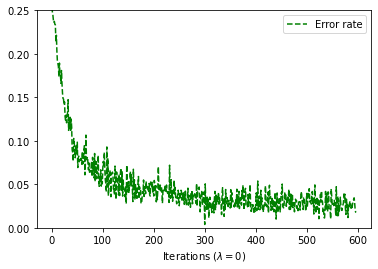

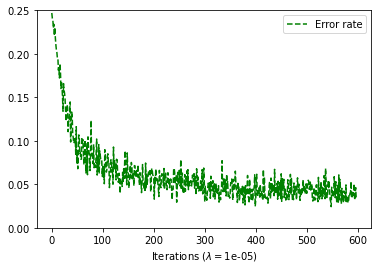

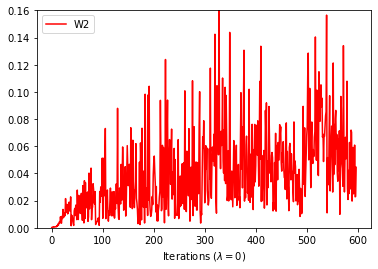

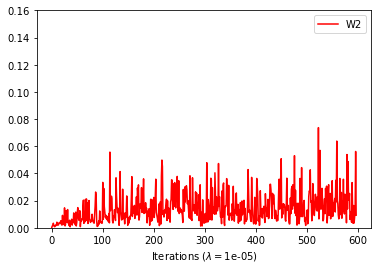

In [9]:
plt.figure()
plt.plot(Lists_Results_noreg['Acc'],'g--',label='Error rate')
plt.xlabel('Iterations ($\lambda=0$)')
plt.legend()
plt.ylim((0.,0.25))
plt.savefig('Convergence_attach_noreg.pdf')


plt.figure()
plt.plot(Lists_Results_reg['Acc'],'g--',label='Error rate')
plt.xlabel('Iterations ($\lambda=$'+str(lambdavar)+')')
plt.legend()
plt.ylim((0.,0.25))
plt.savefig('Convergence_attach_'+str(lambdavar)+'.pdf')


plt.figure()
plt.plot(np.array(Lists_Results_noreg['W2']),'r-',label='W2')
plt.xlabel('Iterations ($\lambda=0$)')
plt.legend()
plt.ylim((0.,0.16))
plt.savefig('Convergence_regul_noreg.pdf')

plt.figure()
plt.plot(np.array(Lists_Results_reg['W2']),'r-',label='W2')
plt.xlabel('Iterations ($\lambda=$'+str(lambdavar)+')')
plt.legend()
plt.ylim((0.,0.16))
plt.savefig('Convergence_regul_'+str(lambdavar)+'.pdf')



**Tests - without regularisation**

In [11]:

predY_test=torch.clone(W2Rmisc.LargeDatasetPred(model_no_reg,X_test.float(),10000,DEVICE=DEVICE))  #prediction made with blocks of 10000 observations to make sure we won't saturate the memory
    
error = nn.MSELoss()  #does not take into account the W2 metric
loss = error(predY_test, y_test.float())
    
tmp_loss=loss.data
print('Loss (test data): '+str(tmp_loss))
            
y_pred_np=1*(predY_test.view(-1).data.numpy()>0.5)
y_true_np=1*(y_test.view(-1).data.numpy()>0.5)
S_np=S_test[:]
    
tmp_DI=W2Rmisc.compute_disparate_impact(y_pred_np, S_np)
print('DI:',tmp_DI)
    
tmp_cm=W2Rmisc.cpt_BasicDescrStats(y_pred_np, y_true_np, S_np)
    
print('s0_RatioGoodPred:',tmp_cm['s0_RatioGoodPred'])
print('s1_RatioGoodPred:',tmp_cm['s1_RatioGoodPred'])


Loss (test data): tensor(0.0374)
DI: 0.8028849971060995
s0_RatioGoodPred: 0.8854458216713315
s1_RatioGoodPred: 0.975390156062425


**Tests - with regularisation**

In [12]:

predY_test=torch.clone(W2Rmisc.LargeDatasetPred(model_reg,X_test.float(),10000,DEVICE=DEVICE))  #prediction made with blocks of 10000 observations to make sure we won't saturate the memory
    
error = nn.MSELoss()  #does not take into account the W2 metric
loss = error(predY_test, y_test.float())
    
tmp_loss=loss.data
print('Loss (test data): '+str(tmp_loss))
            
y_pred_np=1*(predY_test.view(-1).data.numpy()>0.5)
y_true_np=1*(y_test.view(-1).data.numpy()>0.5)
S_np=S_test[:]
    
tmp_DI=W2Rmisc.compute_disparate_impact(y_pred_np, S_np)
print('DI:',tmp_DI)
    
tmp_cm=W2Rmisc.cpt_BasicDescrStats(y_pred_np, y_true_np, S_np)
    
print('s0_RatioGoodPred:',tmp_cm['s0_RatioGoodPred'])
print('s1_RatioGoodPred:',tmp_cm['s1_RatioGoodPred'])


Loss (test data): tensor(0.0401)
DI: 0.9901948311249408
s0_RatioGoodPred: 0.9322271091563374
s1_RatioGoodPred: 0.9711884753901561
